# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [4]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [5]:
df.Revenue.value_counts(dropna=False)

False    10422
True      1908
Name: Revenue, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [6]:
# Verifique a distribuição dessas variáveis
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [7]:
# Traformar a variável OperatingSystems em categórica
df.OperatingSystems = df.OperatingSystems.astype('category')

# Traformar a variável Browser em categórica
df.Browser = df.Browser.astype('category')

# Traformar a variável Region em categórica
df.Region = df.Region.astype('category')

# Traformar a variável TrafficType em categórica
df.TrafficType = df.TrafficType.astype('category')

# Traformar a variável VisitorType em categórica
df.VisitorType = df.VisitorType.astype('category')

# Traformar a variável Weekend em categórica
df.Weekend = df.Weekend.astype('category')

# Traformar a variável Revenue em categórica
df.Revenue = df.Revenue.astype('category')

# Traformar a variável Month em categórica
df.Month = df.Month.astype('category')

# Traformar a variável SpecialDay em categórica
df.SpecialDay = df.SpecialDay.astype('category')

# Verificar a distribuição das variáveis categóricas
df.describe(include='category')


SpecialDay  Month  OperatingSystems  Browser  Region  TrafficType  \
count      12330.0  12330             12330    12330   12330        12330   
unique         6.0     10                 8       13       9           20   
top            0.0    May                 2        2       1            2   
freq       11079.0   3364              6601     7961    4780         3913   

              VisitorType Weekend Revenue  
count               12330   12330   12330  
unique                  3       2       2  
top     Returning_Visitor   False   False  
freq                10551    9462   10422

In [8]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues  
count  12330.000000  12330.000000  12330.000000  
mean       0.022191      0.043073      5.889258  
std        0.048488      0.048597     18.568437  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.014286      0.000000  
50%        0.003112      0.025156      0.000000  
75%        0.016813      0.050000      0.000000  
max        0.200000      0.200000    361.763742

In [9]:
# Veja se há valores *missing* e caso haja, decida o que fazer
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

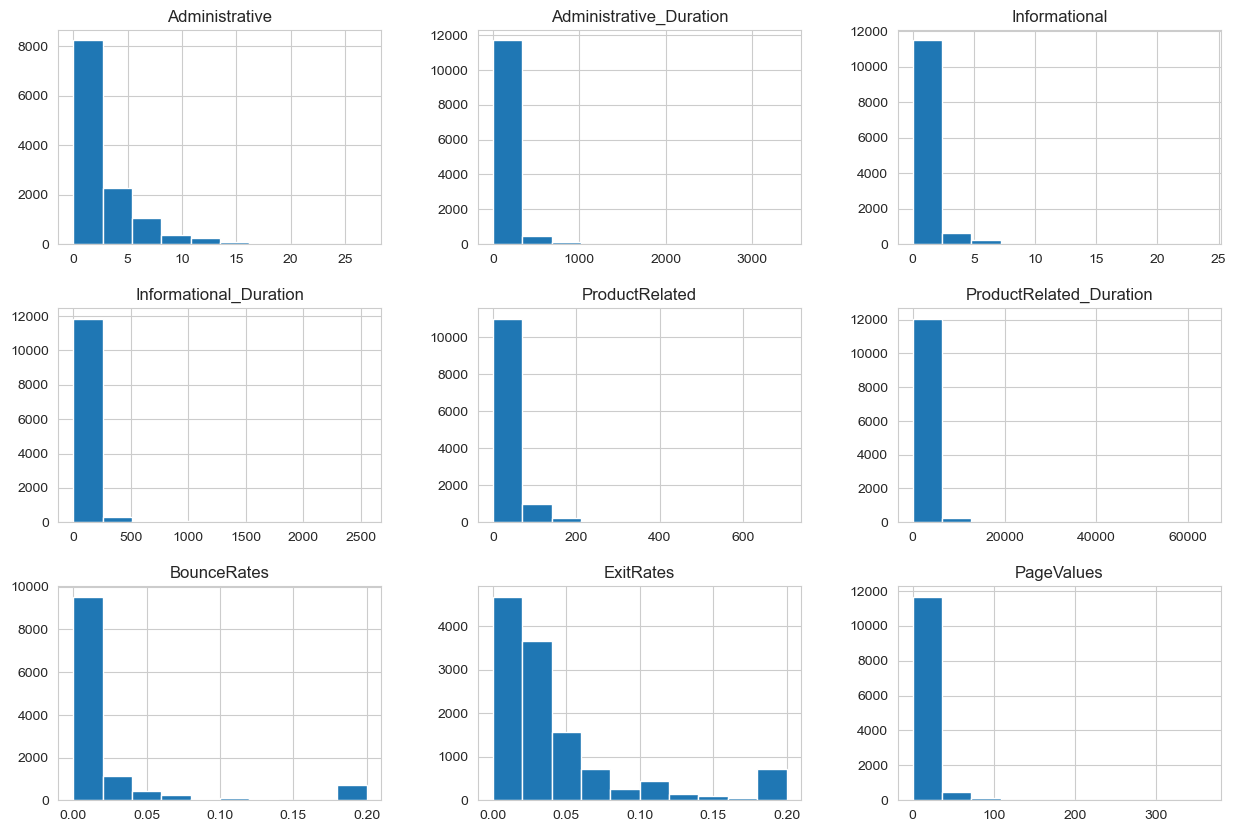

In [10]:
# Visualizar a distribuição das variáveis numéricas
df.hist(figsize=(15,10))
plt.show()

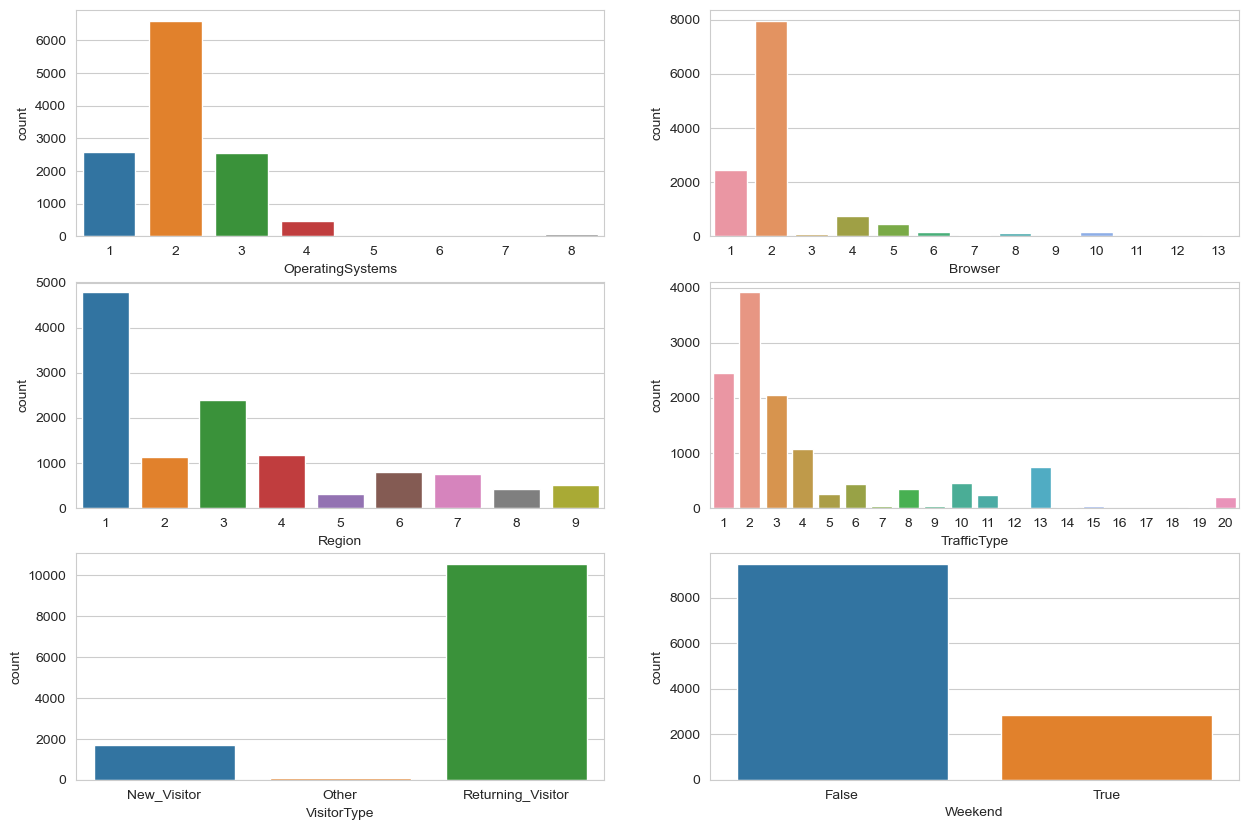

In [11]:
# Visualizar a distribuição das variáveis categóricas
fig, ax = plt.subplots(3, 2, figsize=(15,10))
sns.countplot(x='OperatingSystems', data=df, ax=ax[0,0])
sns.countplot(x='Browser', data=df, ax=ax[0,1])
sns.countplot(x='Region', data=df, ax=ax[1,0])
sns.countplot(x='TrafficType', data=df, ax=ax[1,1])
sns.countplot(x='VisitorType', data=df, ax=ax[2,0])
sns.countplot(x='Weekend', data=df, ax=ax[2,1])
plt.show()

In [13]:
# Padronizar as variáveis numéricas
scaler = StandardScaler()

# Selecionando apenas as colunas numéricas e aplicando o scaler
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues SpecialDay Month OperatingSystems  \
0     3.667189   3.229316   -0.317178        0.0   Feb                1   
1    -0.457683   1.171473   -0.317178        0.0   Feb                2   
2     3.667189   3.229316   -0.317178        0.0   Feb                4   
3     0.573535   1.994610   -0.317178        0.0   Feb                3   
4    -0.045196   0.142551   -0.317178        0.0   Feb                3   

  Browser Region TrafficType        VisitorType Weekend Revenue  
0       1      1           1  Returning_Visitor   False   False  
1       2      1           2  Returning_Visitor   False   False  
2       1      9           3  Returning_Visitor   False   False  
3       2      2           4  Returning_Visitor   False   False  
4       3      1           4  Returning_Visitor    True   False

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

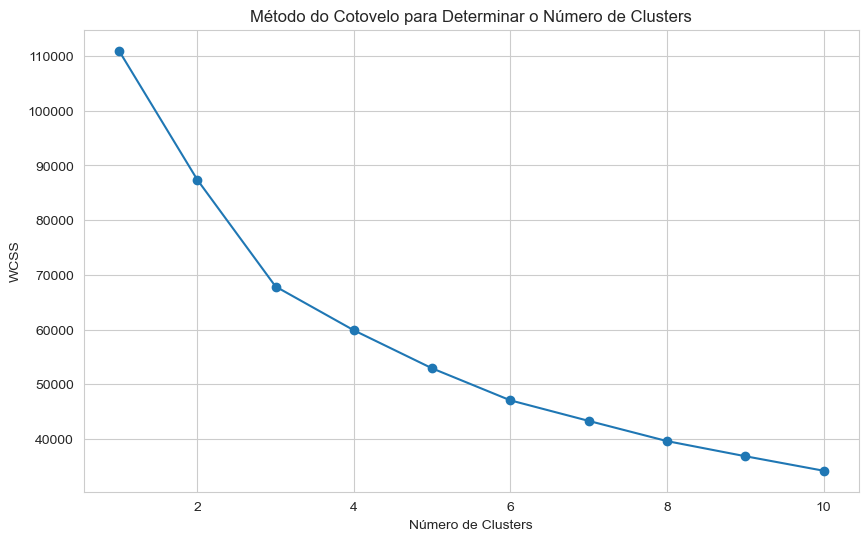

In [17]:
# Selecionando apenas as colunas numéricas para o K-Means
data_numerical = df.select_dtypes(include=['int64', 'float64'])

# Lista para armazenar as somas dos quadrados das distâncias
wcss = []

# Testando diferentes números de clusters (de 1 a 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_numerical)
    wcss.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Within-Cluster Sum of Square
plt.grid(True)
plt.show()

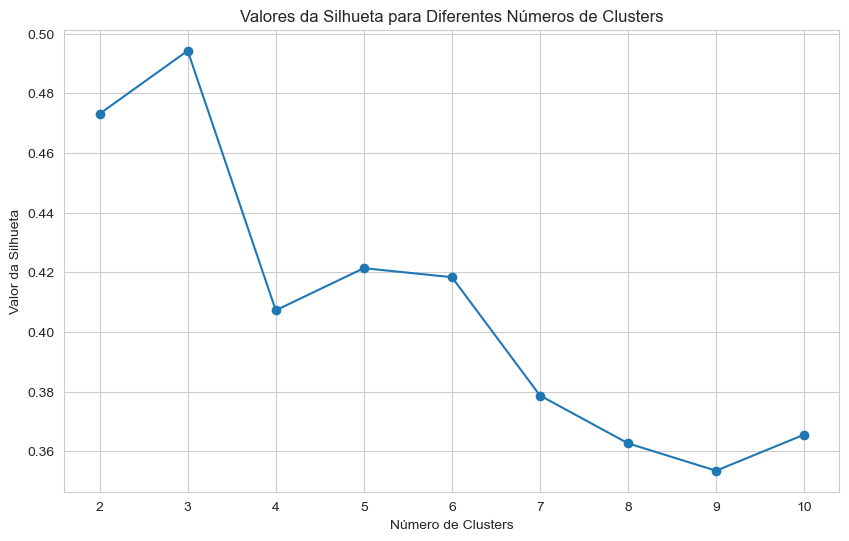

In [20]:
# Método da Silhueta
silhouette_scores = []

# Calculando o valor da silhueta para diferentes números de clusters (de 2 a 10)
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_numerical)
    score = silhouette_score(data_numerical, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando os valores da silhueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Valores da Silhueta para Diferentes Números de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Valor da Silhueta')
plt.grid(True)
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [52]:
# K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data_numerical)

# Adicionando a coluna de labels ao dataset
df['cluster_3'] = kmeans.labels_
df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues SpecialDay Month OperatingSystems  \
0     3.667189   3.229316   -0.317178        0.0   Feb                1   
1    -0.457683   1.171473   -0.317178        0.0   Feb                2   
2     3.667189   3.229316   -0.317178        0.0   Feb                4   
3     0.573535   1.994610   -0.317178        0.0   Feb                3   
4    -0.045196   0.142551   -0.317178        0.0   Feb                3   

  Browser Region TrafficType        VisitorType Weekend Revenue  cluster_4  \
0       1      1           1  Returning_Visitor   False   False          3   
1       2      1           2  Returning_Visitor   False   False          2   
2       1      9           3  Returning_Visitor   False   False          3   
3       2      2           4  Returning_Visitor   False   False          2   
4       3      1           4  Returning_Visitor    True   False          2   

   cluster_3  
0          2  
1          1  
2          2  
3          1  
4          1

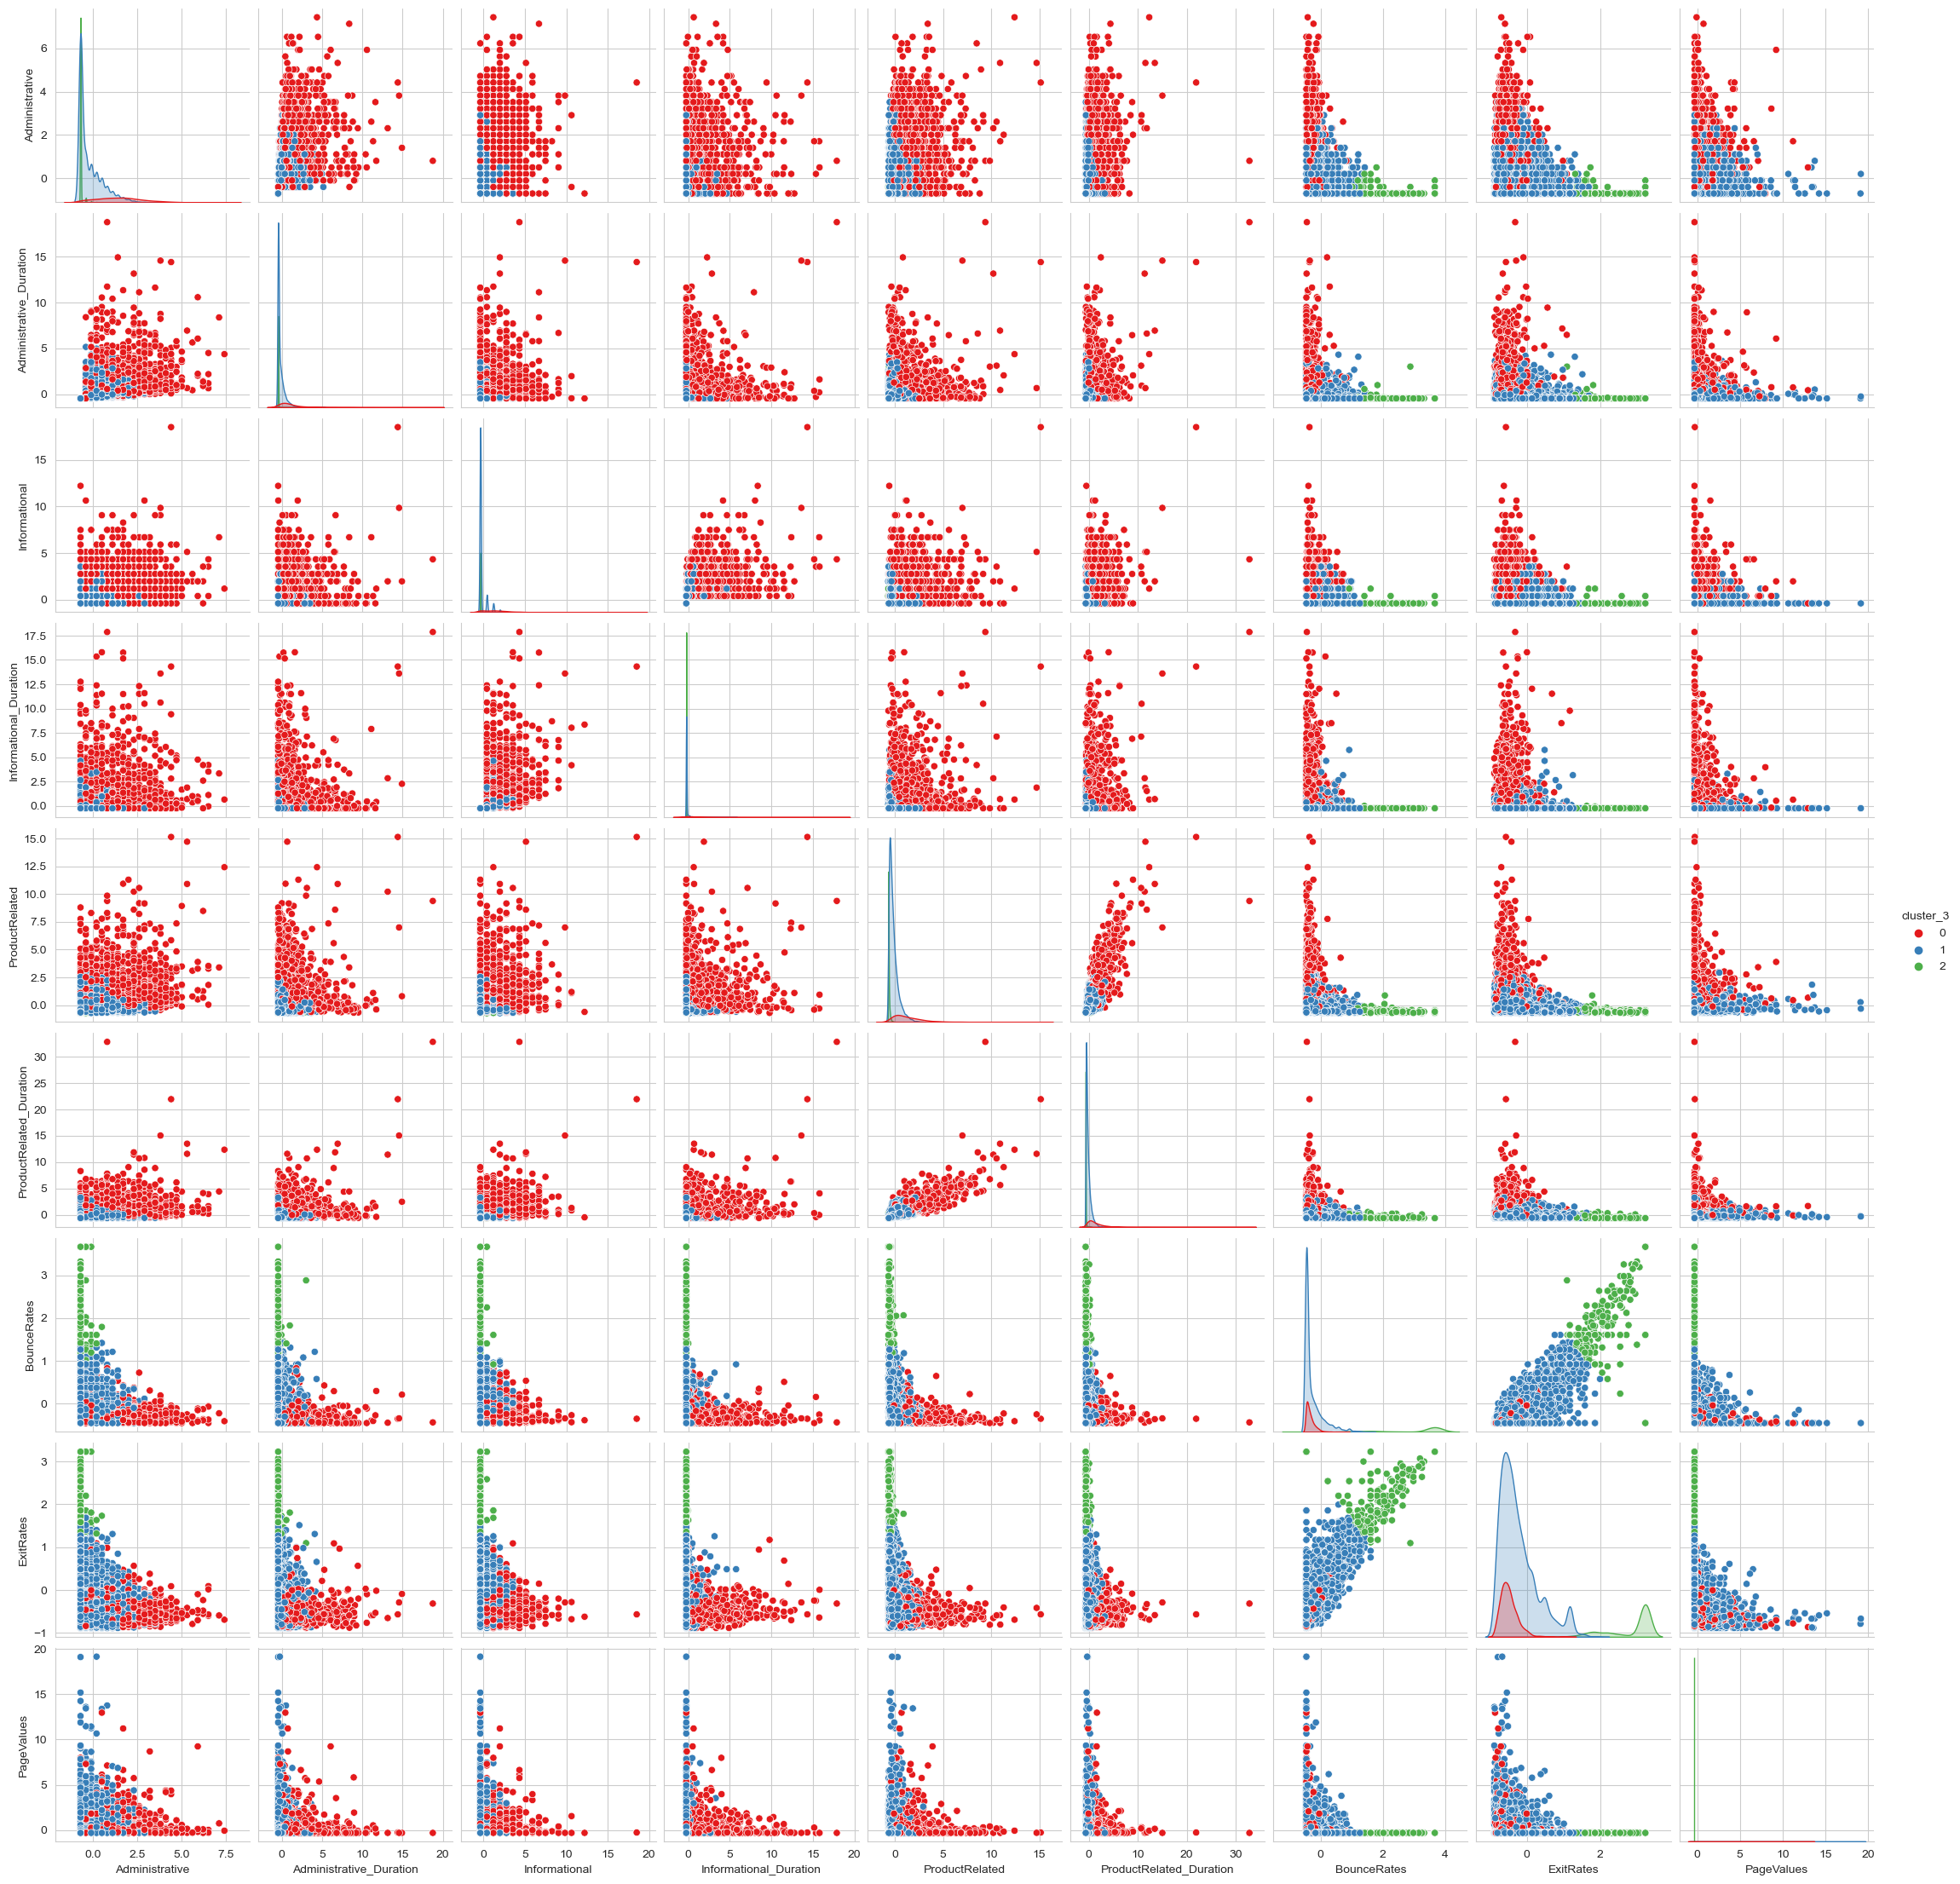

In [23]:
# Plotando um Pairplot com os clusters (3)
sns.pairplot(df[numerical_columns], hue='cluster_3', palette='Set1')
plt.show()

In [37]:
# Estatísticas descritivas para as variáveis numéricas em cada cluster
numerical_desc = df.groupby('cluster_3')[numerical_columns].describe()

numerical_desc

Administrative                                                    \
                   count      mean       std       min       25%       50%   
cluster_3                                                                    
0                 1623.0  1.524843  1.360818 -0.696993  0.507228  1.410394   
1                 9673.0 -0.182868  0.700018 -0.696993 -0.696993 -0.395938   
2                 1034.0 -0.682726  0.086195 -0.696993 -0.696993 -0.696993   

                              Administrative_Duration            ...  \
                75%       max                   count      mean  ...   
cluster_3                                                        ...   
0          2.313560  7.431499                  1623.0  1.285707  ...   
1          0.206173  3.517781                  9673.0 -0.167724  ...   
2         -0.696993  0.507228                  1034.0 -0.449040  ...   

          ExitRates           PageValues                                    \
                75%       max      count      mean           std       min   
cluster_3                                                                    
0         -0.371663  1.171473     1623.0  0.203796  1.076224e+00 -0.317178   
1          0.009357  1.994610     9673.0 -0.000289  1.030946e+00 -0.317178   
2          3.229316  3.229316     1034.0 -0.317178  2.665825e-15 -0.317178   

                                                    
                25%       50%       75%        max  
cluster_3                                           
0         -0.317178 -0.219348  0.253431  12.972503  
1         -0.317178 -0.317178 -0.317178  19.166337  
2         -0.317178 -0.317178 -0.317178  -0.317178  

[3 rows x 72 columns]

In [38]:
# Estatísticas descritivas para as variáveis categóricas em cada cluster

categorical_desc = df.groupby('cluster_3').describe(include='category')
categorical_desc

SpecialDay                     Month                    \
               count unique  top    freq count unique  top  freq   
cluster_3                                                          
0             1623.0    6.0  0.0  1535.0  1623     10  Nov   613   
1             9673.0    6.0  0.0  8683.0  9673     10  May  2679   
2             1034.0    6.0  0.0   861.0  1034     10  May   356   

          OperatingSystems         ...        VisitorType       Weekend  \
                     count unique  ...                top  freq   count   
cluster_3                          ...                                    
0                     1623      7  ...  Returning_Visitor  1523    1623   
1                     9673      8  ...  Returning_Visitor  8041    9673   
2                     1034      7  ...  Returning_Visitor   987    1034   

                              Revenue                      
          unique    top  freq   count unique    top  freq  
cluster_3                                                  
0              2  False  1211    1623      2  False  1173  
1              2  False  7394    9673      2  False  8221  
2              2  False   857    1034      2  False  1028  

[3 rows x 36 columns]

In [43]:
# K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(data_numerical)

# Adicionando a coluna de labels ao dataset
df['cluster_4'] = kmeans.labels_
df.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues SpecialDay Month OperatingSystems  \
0     3.667189   3.229316   -0.317178        0.0   Feb                1   
1    -0.457683   1.171473   -0.317178        0.0   Feb                2   
2     3.667189   3.229316   -0.317178        0.0   Feb                4   
3     0.573535   1.994610   -0.317178        0.0   Feb                3   
4    -0.045196   0.142551   -0.317178        0.0   Feb                3   

  Browser Region TrafficType        VisitorType Weekend Revenue  cluster_4  
0       1      1           1  Returning_Visitor   False   False          3  
1       2      1           2  Returning_Visitor   False   False          2  
2       1      9           3  Returning_Visitor   False   False          3  
3       2      2           4  Returning_Visitor   False   False          2  
4       3      1           4  Returning_Visitor    True   False          2

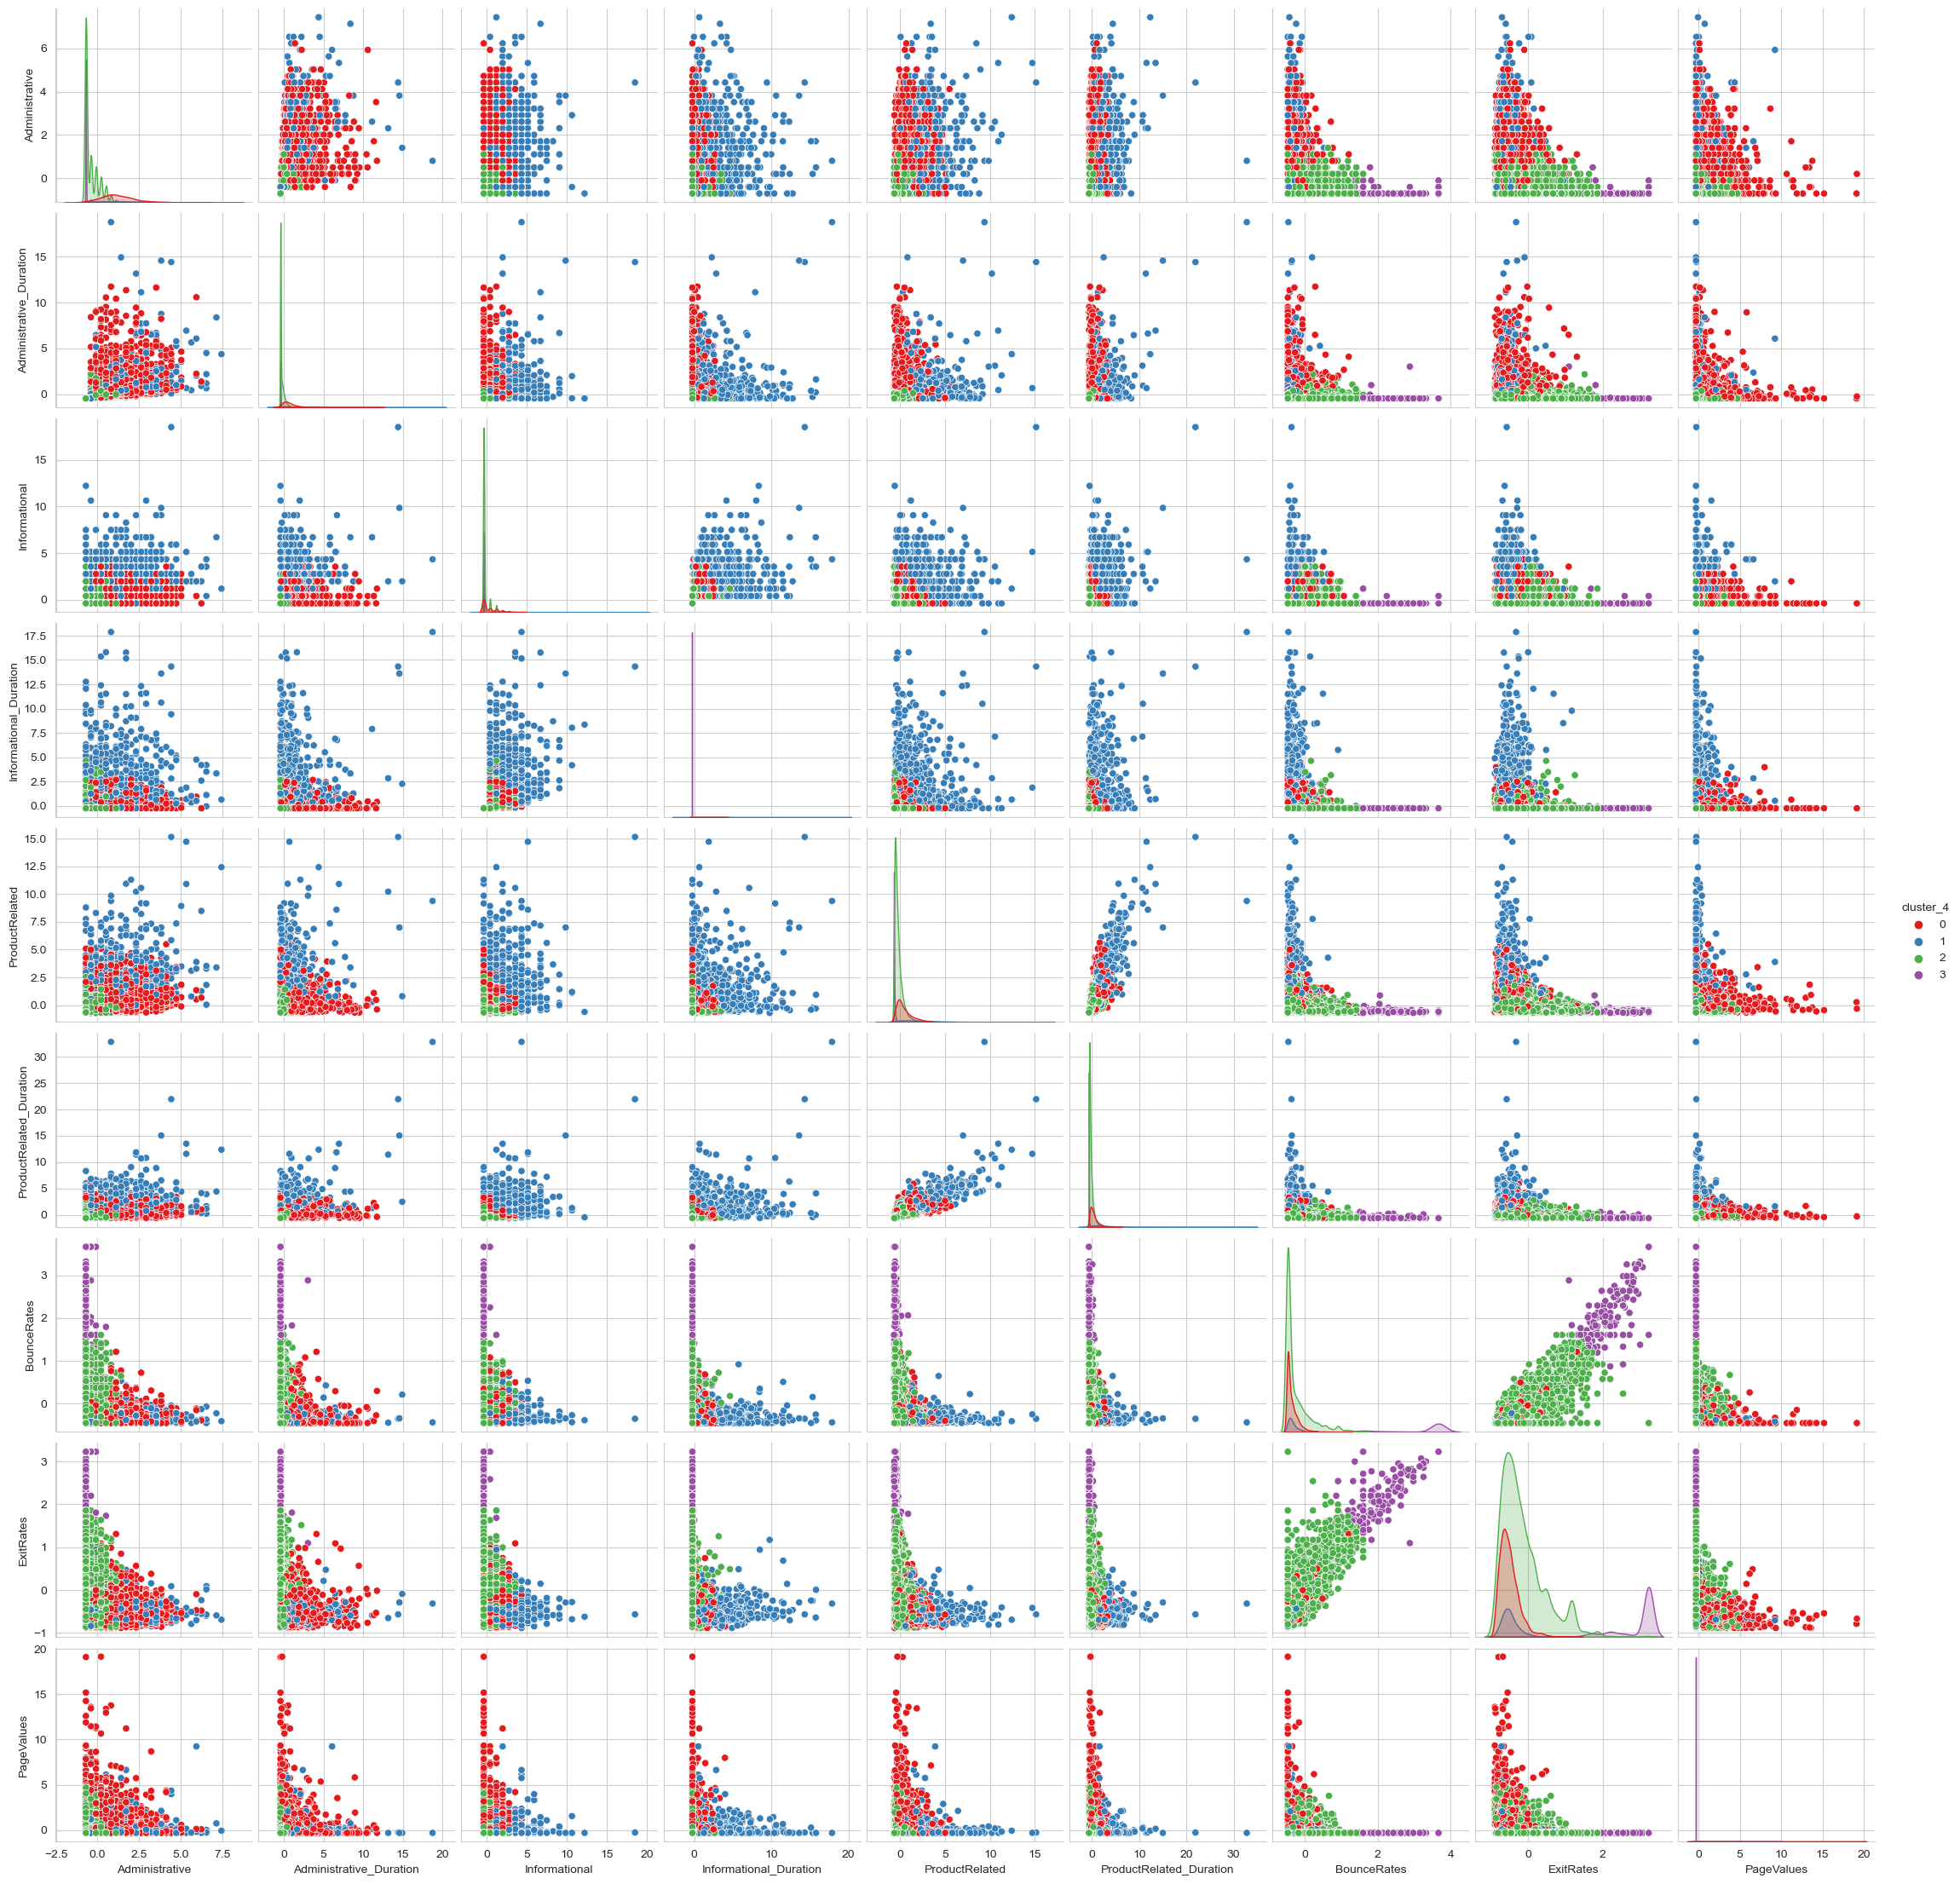

In [47]:
# Plotando um Pairplot com os clusters (4)

sns.pairplot(df, hue='cluster_4', palette='Set1')
plt.show()

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [67]:
# Calculando a quantidade de Revenue (compras) para cada cluster 3
qtd_revenue_3 = df.groupby('cluster_3')['Revenue'].value_counts(normalize=True)

# Criando um DataFrame com as médias de BounceRates e Revenue
bounce_rates_revenue_3 = pd.DataFrame({
    'Revenue': qtd_revenue_3
})


# Calculando a quantidade de Revenue (compras) para cada cluster 4
qtd_revenue_4 = df.groupby('cluster_4')['Revenue'].value_counts(normalize=True)

# Criando um DataFrame com as médias de BounceRates e Revenue
bounce_rates_revenue_4 = pd.DataFrame({
    'Revenue': qtd_revenue_4
})

bounce_rates_revenue_3, bounce_rates_revenue_4


(                    Revenue
 cluster_3 Revenue          
 0         False    0.722736
           True     0.277264
 1         False    0.849891
           True     0.150109
 2         False    0.994197
           True     0.005803,
                     Revenue
 cluster_4 Revenue          
 0         False    0.707221
           True     0.292779
 1         False    0.701667
           True     0.298333
 2         False    0.881569
           True     0.118431
 3         False    0.994589
           True     0.005411)

In [69]:
print(f"Com Número de Clusters = 3. O grupo com mais compras é o 0 com 27% de conversão")
print(f"Com Número de Clusters = 4. Há um empate entre os grupos 0 e 1 com 29% de conversão, como são praticamente equivalentes, a melhor escolha seria utilizar 3 clusters")


Com Número de Clusters = 3. O grupo com mais compras é o 0 com 27% de conversão
Com Número de Clusters = 4. Há um empate entre os grupos 0 e 1 com 29% de conversão, como são praticamente equivalentes, a melhor escolha seria utilizar 3 clusters
